In [1]:
#Import necessary llibraries
import pandas as pd  # For data manipulation and analysis
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting data and hyperparameter tuning
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.neighbors import KNeighborsClassifier  # For K-Nearest Neighbors classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc  # For evaluating model performance
import matplotlib.pyplot as plt  # For creating plots and visualizations
import seaborn as sns  # For creating advanced visualizations
import joblib  # For saving and loading trained models
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset
df = pd.read_csv("song_attributes.csv")

In [3]:
# Display the first 20 rows of the dataset
df.head(20)

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0        0.00402         0.902       151274   0.714          0.487000    6   
1        0.03550         0.924       123901   0.631          0.052000    6   
2        0.01020         0.841       176728   0.852          0.036900   11   
3        0.02770         0.867       291463   0.417          0.807000    8   
4        0.00189         0.776       210110   0.926          0.376000    8   
5        0.02300         0.649       133714   0.705          0.814000    0   
6        0.00270         0.834       262427   0.700          0.773000    6   
7        0.03010         0.805       145662   0.900          0.800000    1   
8        0.24200         0.866       340589   0.519          0.051500    7   
9        0.00169         0.697       166060   0.929          0.777000    1   
10       0.00490         0.742       179429   0.558          0.001340   10   
11       0.66900         0.684       218400   0.531          0.013000    9   
12       0.46700         0.845       256970   0.484          0.000086   10   
13       0.70800         0.685       153584   0.403          0.000004   10   
14       0.34100         0.883       123429   0.489          0.000037   11   
15       0.22400         0.483       178688   0.526          0.000000    6   
16       0.02710         0.808       189099   0.554          0.000059    1   
17       0.17600         0.751       229655   0.675          0.000000    6   
18       0.19800         0.872       139435   0.703          0.000369    6   
19       0.38500         0.462       173113   0.689          0.000000    7   

    liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0     0.1280    -6.718     0       0.1990  140.009               4    0.892   
1     0.1190    -6.131     1       0.2040  140.016               4    0.903   
2     0.1510    -5.764     1       0.2460  144.996               4    0.640   
3     0.0712   -10.317     1       0.0897  125.982               4    0.634   
4     0.0701    -7.362     1       0.1000  140.030               4    0.233   
5     0.1450    -9.685     1       0.0504  139.994               4    0.682   
6     0.1590    -5.994     0       0.1170  134.976               4    0.700   
7     0.1680    -6.834     1       0.0916  132.983               4    0.480   
8     0.3770    -8.964     1       0.3210  122.047               4    0.683   
9     0.0877    -5.849     1       0.0690  151.974               4    0.651   
10    0.1090    -9.472     0       0.1050  105.002               4    0.631   
11    0.1350    -7.037     0       0.0523  100.014               4    0.613   
12    0.1210    -6.926     1       0.1700   99.010               4    0.697   
13    0.1310   -10.225     0       0.0729  169.625               3    0.667   
14    0.1430   -10.010     0       0.1730  105.034               4    0.462   
15    0.1310    -8.538     1       0.2230  187.978               4    0.747   
16    0.1870    -9.979     1       0.0971  104.024               4    0.258   
17    0.1270    -9.299     0       0.0540  116.033               4    0.593   
18    0.0811    -8.412     0       0.0724  117.029               4    0.694   
19    0.1990    -8.357     0       0.2920   94.931               4    0.383   

    like  
0      1  
1      1  
2      1  
3      1  
4      1  
5      1  
6      1  
7      1  
8      1  
9      1  
10     1  
11     1  
12     1  
13     1  
14     1  
15     1  
16     1  
17     1  
18     1  
19     1

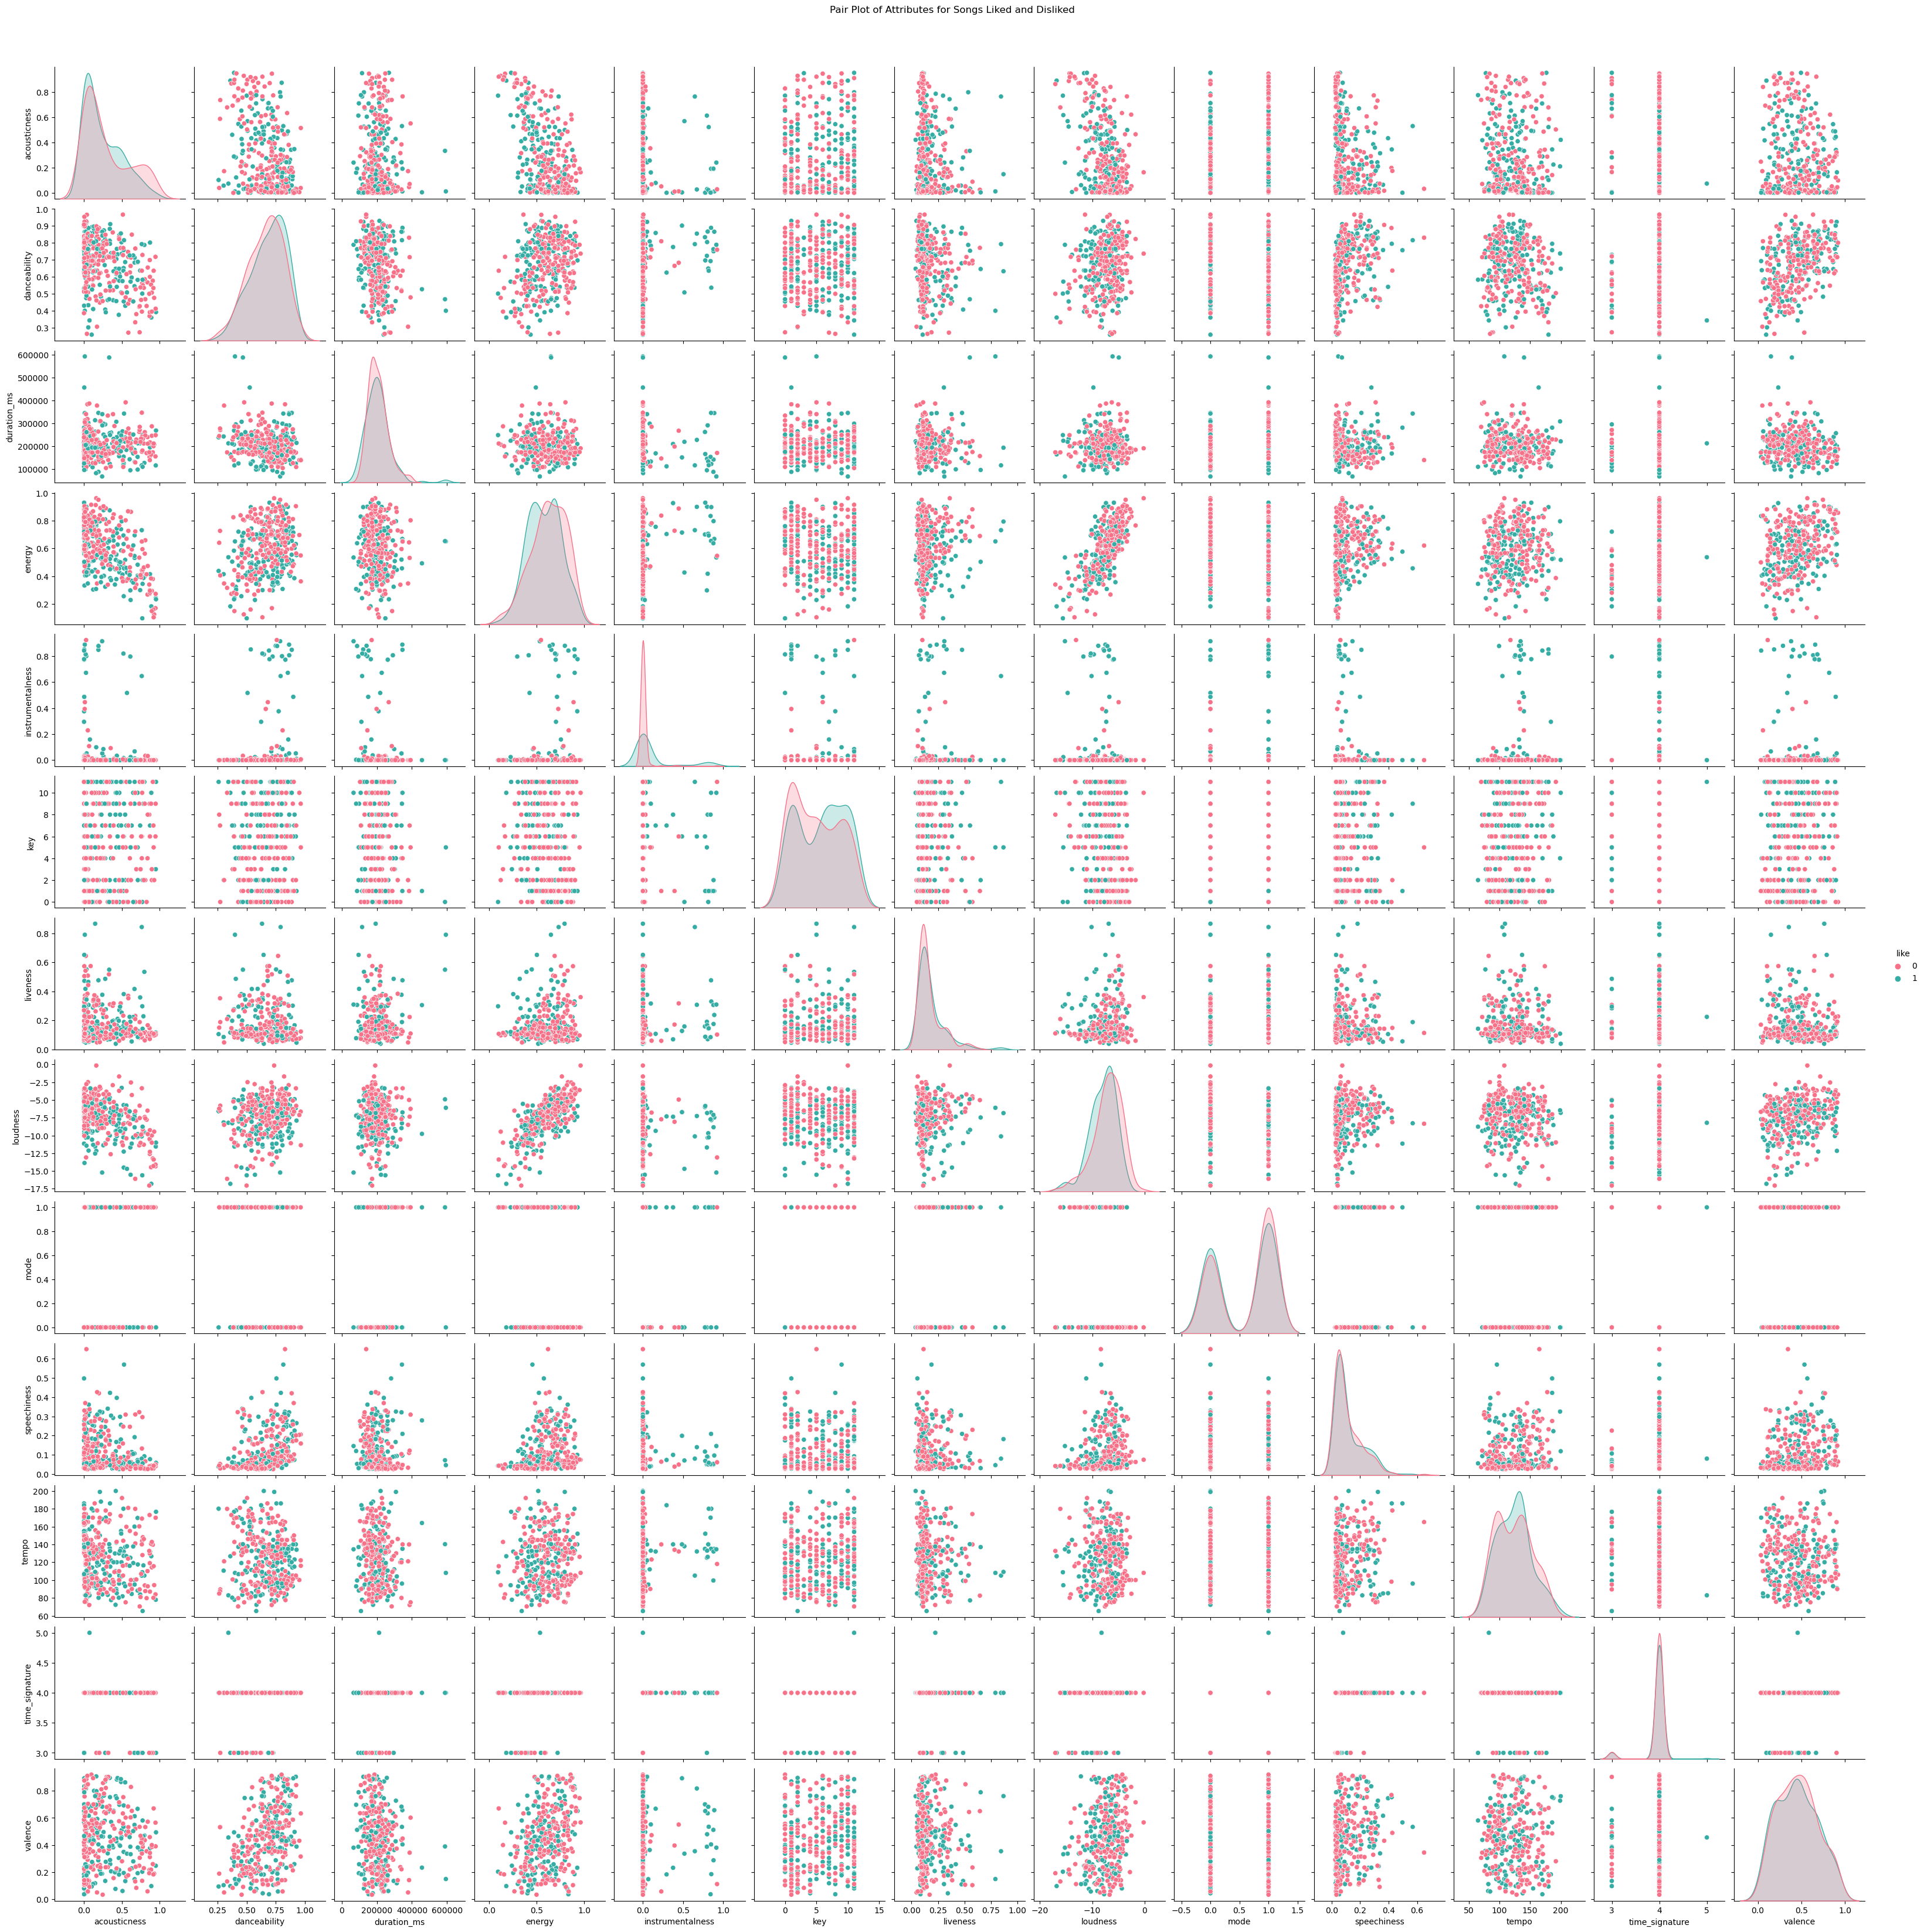

In [4]:
# Example: Pair plot for selected attributes
sns.pairplot(df, vars= ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence'], hue='like', palette='husl')
plt.suptitle('Pair Plot of Attributes for Songs Liked and Disliked', y=1.02)
plt.show()

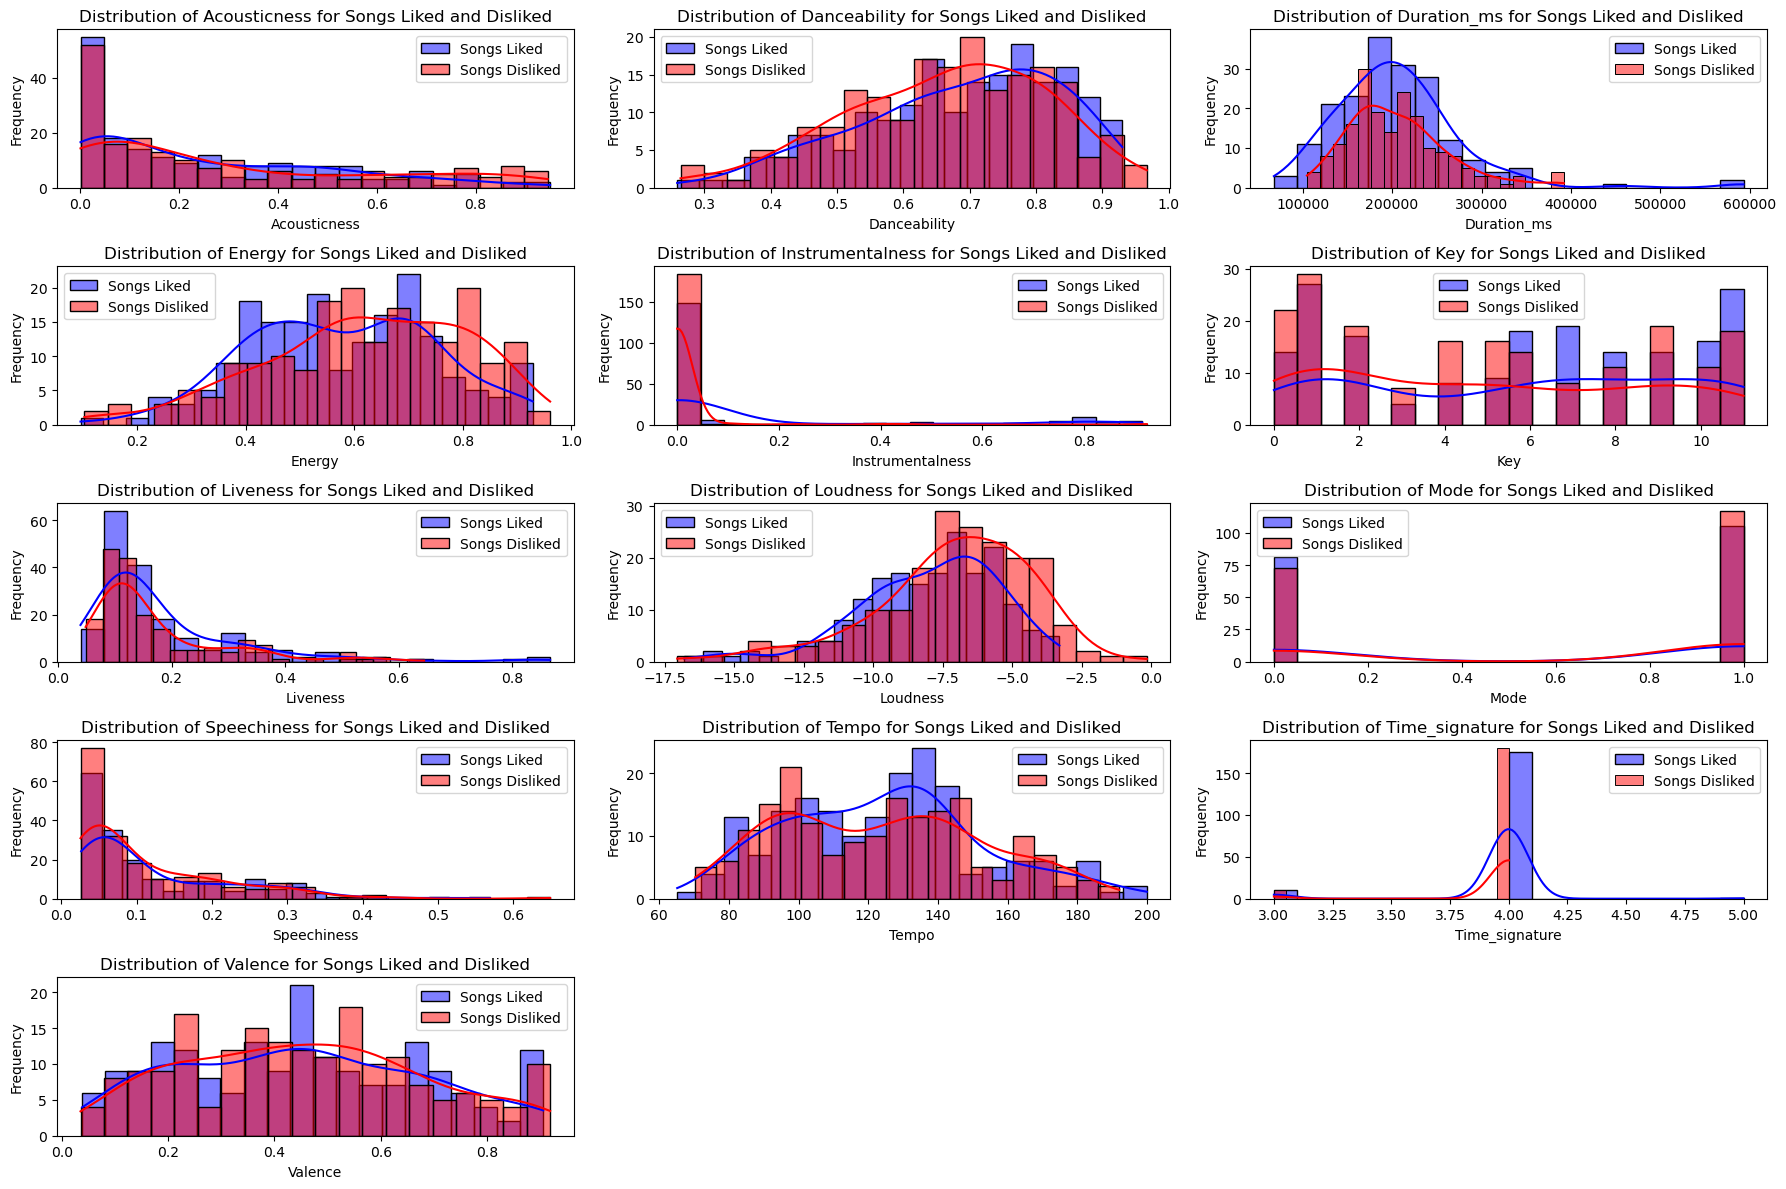

In [5]:
# Function to plot the distribution of a single attribute
def plot_attribute_distribution(ax, df, attribute):
    """
    Plots the distribution of a given attribute for songs liked and disliked.
    
    Parameters:
    - ax: matplotlib axes object
    - df: DataFrame containing song attributes and labels
    - attribute: string, name of the attribute to plot
    
    Returns:
    - None
    """
    sns.histplot(df[df['like'] == 1][attribute], bins=20, kde=True, color='blue', label='Songs Liked', ax=ax)
    sns.histplot(df[df['like'] == 0][attribute], bins=20, kde=True, color='red', label='Songs Disliked', ax=ax)
    ax.set_xlabel(attribute.capitalize())  # Capitalize attribute name for xlabel
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {attribute.capitalize()} for Songs Liked and Disliked')
    ax.legend()

# Function to plot distributions for all numerical attributes
def plot_all_attribute_distributions(df):
    """
    Plots the distribution of all numerical attributes for songs liked and disliked.
    
    Parameters:
    - df: DataFrame containing song attributes and labels
    
    Returns:
    - None
    """
    numerical_attributes = ['acousticness', 'danceability', 'duration_ms', 
                            'energy', 'instrumentalness', 'key', 
                            'liveness', 'loudness', 'mode', 
                            'speechiness', 'tempo', 'time_signature', 'valence']
    
    num_cols = 3  # Number of columns in the subplot grid
    num_rows = (len(numerical_attributes) + num_cols - 1) // num_cols  # Calculate number of rows needed
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))  # Adjusted figsize for better layout
    
    # Flatten axes if there's only one row
    if num_rows == 1:
        axes = axes.reshape(1, -1)
    
    for i, attribute in enumerate(numerical_attributes):
        plot_attribute_distribution(axes[i // num_cols, i % num_cols], df, attribute)
    
    # Hide unused subplots
    for j in range(i + 1, num_rows * num_cols):
        axes[j // num_cols, j % num_cols].axis('off')
    
    plt.tight_layout()
    plt.show()

# Plot all attribute distributions
plot_all_attribute_distributions(df)


In [6]:
# Check for missing values
df.isnull().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
like                0
dtype: int64

In [7]:
# Check data types of columns
df.dtypes

acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
like                  int64
dtype: object

In [8]:
# List column names
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'like'],
      dtype='object')

In [9]:
# Display the first 20 rows of the dataset
df.head(20)

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0        0.00402         0.902       151274   0.714          0.487000    6   
1        0.03550         0.924       123901   0.631          0.052000    6   
2        0.01020         0.841       176728   0.852          0.036900   11   
3        0.02770         0.867       291463   0.417          0.807000    8   
4        0.00189         0.776       210110   0.926          0.376000    8   
5        0.02300         0.649       133714   0.705          0.814000    0   
6        0.00270         0.834       262427   0.700          0.773000    6   
7        0.03010         0.805       145662   0.900          0.800000    1   
8        0.24200         0.866       340589   0.519          0.051500    7   
9        0.00169         0.697       166060   0.929          0.777000    1   
10       0.00490         0.742       179429   0.558          0.001340   10   
11       0.66900         0.684       218400   0.531          0.013000    9   
12       0.46700         0.845       256970   0.484          0.000086   10   
13       0.70800         0.685       153584   0.403          0.000004   10   
14       0.34100         0.883       123429   0.489          0.000037   11   
15       0.22400         0.483       178688   0.526          0.000000    6   
16       0.02710         0.808       189099   0.554          0.000059    1   
17       0.17600         0.751       229655   0.675          0.000000    6   
18       0.19800         0.872       139435   0.703          0.000369    6   
19       0.38500         0.462       173113   0.689          0.000000    7   

    liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0     0.1280    -6.718     0       0.1990  140.009               4    0.892   
1     0.1190    -6.131     1       0.2040  140.016               4    0.903   
2     0.1510    -5.764     1       0.2460  144.996               4    0.640   
3     0.0712   -10.317     1       0.0897  125.982               4    0.634   
4     0.0701    -7.362     1       0.1000  140.030               4    0.233   
5     0.1450    -9.685     1       0.0504  139.994               4    0.682   
6     0.1590    -5.994     0       0.1170  134.976               4    0.700   
7     0.1680    -6.834     1       0.0916  132.983               4    0.480   
8     0.3770    -8.964     1       0.3210  122.047               4    0.683   
9     0.0877    -5.849     1       0.0690  151.974               4    0.651   
10    0.1090    -9.472     0       0.1050  105.002               4    0.631   
11    0.1350    -7.037     0       0.0523  100.014               4    0.613   
12    0.1210    -6.926     1       0.1700   99.010               4    0.697   
13    0.1310   -10.225     0       0.0729  169.625               3    0.667   
14    0.1430   -10.010     0       0.1730  105.034               4    0.462   
15    0.1310    -8.538     1       0.2230  187.978               4    0.747   
16    0.1870    -9.979     1       0.0971  104.024               4    0.258   
17    0.1270    -9.299     0       0.0540  116.033               4    0.593   
18    0.0811    -8.412     0       0.0724  117.029               4    0.694   
19    0.1990    -8.357     0       0.2920   94.931               4    0.383   

    like  
0      1  
1      1  
2      1  
3      1  
4      1  
5      1  
6      1  
7      1  
8      1  
9      1  
10     1  
11     1  
12     1  
13     1  
14     1  
15     1  
16     1  
17     1  
18     1  
19     1

In [10]:
# Split the data into features and target variable
X = df.drop('like', axis = 1)  # Features
y = df['like']  # Target variable

In [11]:
# Scale the numerical features
columns = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']
scaler = StandardScaler()
df[columns] = scaler.fit_transform(df[columns])

In [12]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Save the split datasets to CSV files
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

Models Confusion Matrices

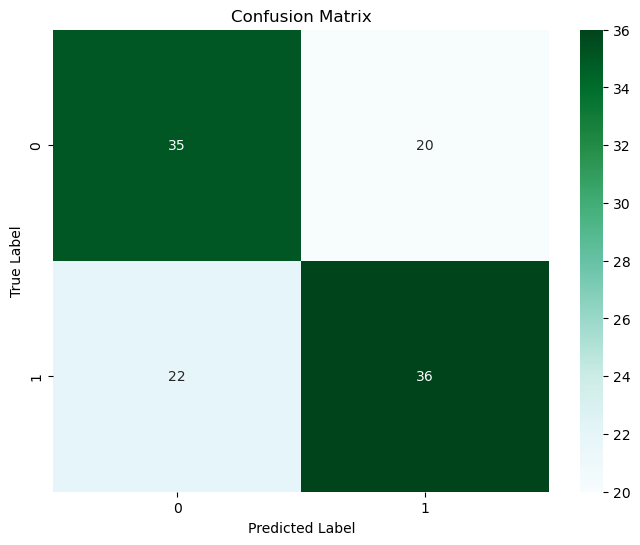

Best Hyperparameters:
{'n_neighbors': 7, 'weights': 'distance'}
Confusion Matrix:
[[35 20]
 [22 36]]
Accuracy: 0.63
Precision: 0.64
Recall: 0.62


In [14]:
# Load data
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

# Preprocessing - Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning for K-Nearest Neighbors classifier
param_grid = {
    'n_neighbors': [1, 3, 5, 7],
    'weights': ['uniform', 'distance']
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train.values.ravel())
best_params = grid_search.best_params_
best_knn_classifier = grid_search.best_estimator_

# Training the KNN classifier with the best hyperparameters
best_knn_classifier.fit(X_train_scaled, y_train.values.ravel())

# Prediction and evaluation
y_pred = best_knn_classifier.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Visualization - Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuGn')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print metrics and best hyperparameters
print("Best Hyperparameters:")
print(best_params)
print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))


In [15]:
#Evaluate model performance on training data
y_train_pred = best_knn_classifier.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy}')

Training Accuracy: 0.9961977186311787


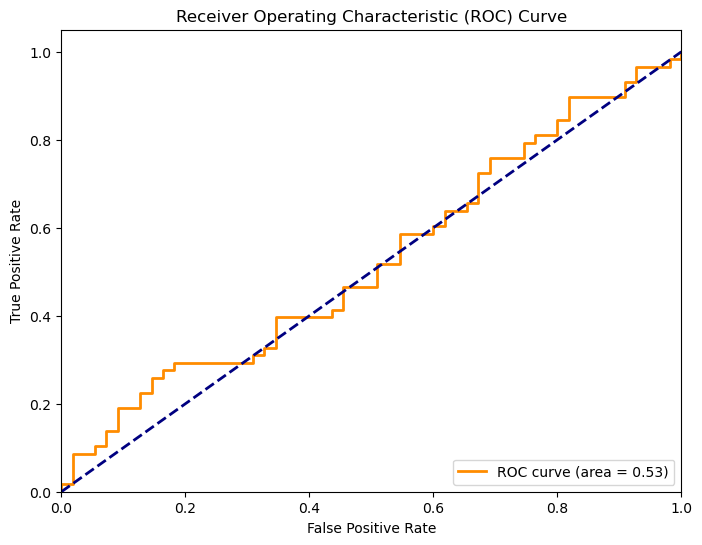

In [16]:
# Predict probabilities for the positive class (class 1)
y_prob = best_knn_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [17]:
# Display the first 5 rows of the training and test datasets
X_train.head(5)

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0         0.058         0.856       220822   0.721               0.0    7   
1         0.603         0.726       143227   0.408               0.0   11   
2         0.335         0.563       178147   0.664               0.0    9   
3         0.165         0.461       228373   0.593               0.0    1   
4         0.385         0.462       173113   0.689               0.0    7   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  
0    0.4660    -5.635     1       0.3060  107.966               4    0.436  
1    0.2250    -6.606     0       0.0614  115.918               4    0.459  
2    0.0849    -5.044     1       0.1540  166.928               4    0.688  
3    0.3070    -4.954     1       0.0356  134.165               3    0.174  
4    0.1990    -8.357     0       0.2920   94.931               4    0.383

In [18]:
X_test.head(5)

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0       0.00588         0.711       252262   0.611              0.00    1   
1       0.92700         0.476       207312   0.124              0.00    2   
2       0.09570         0.811       148552   0.640              0.00    5   
3       0.05750         0.302       242956   0.414              0.00    2   
4       0.52100         0.636       117333   0.693              0.82    1   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  
0    0.2300    -5.453     1       0.3300  134.093               4    0.144  
1    0.0972    -9.463     1       0.0443   94.299               4    0.190  
2    0.1270    -5.630     0       0.2740  145.031               4    0.527  
3    0.0861    -8.160     1       0.0319  110.508               4    0.105  
4    0.1460   -10.265     1       0.0589  179.990               4    0.535

In [19]:
y_train.head(5)

like
0     1
1     1
2     0
3     0
4     1

In [20]:
y_test.head(5)

like
0     0
1     0
2     0
3     1
4     1

In [22]:
# Save the trained KNN model to a file
model_path = 'model.pkl'  # Adjust the path accordingly
joblib.dump(best_knn_classifier, model_path)

print(f"Model saved successfully to {model_path}")


Model saved successfully to D:/spotify ML/song_like_predictor.pkl
